In [2]:
import numpy as np
import sympy
from sympy import *
from sympy.abc import x, y
from sympy.matrices import eye
import math
from math import sin, cos, pi, e
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from _collections_abc import Iterable, Callable
%config InlineBackend.figure_format = 'retina'
sympy.init_printing()

In [3]:
def localError(x1, v1, h):
    A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
    vv = v1
    E = eye(2)
    for i in range(1):
        vect = vv
        k1 = A*vect
        tt = (E + 0.5*h*A)#*A*vect
        t1 = E-h*0.5*A
        t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
        k2 = t1*tt*A*vect
        #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
        t = vect + (k1 + k2)*h*0.5   
        #print(t)
    return t

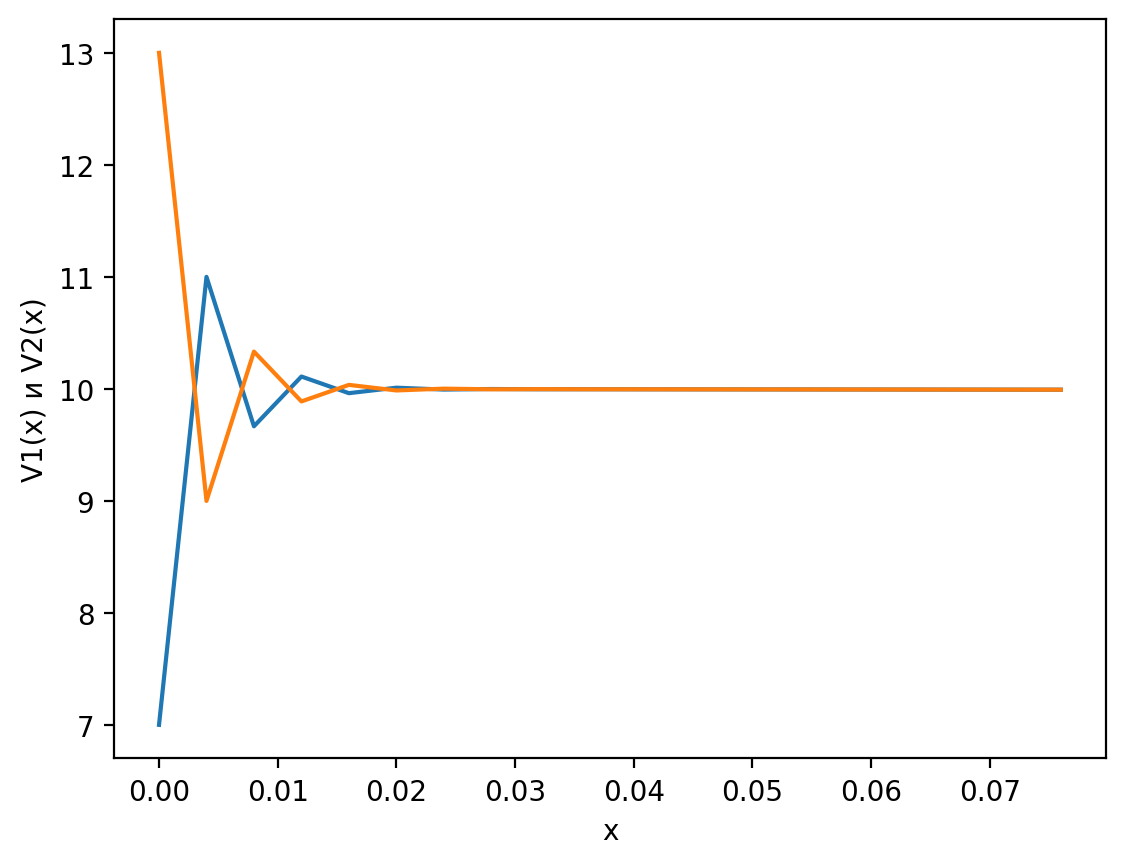

[Matrix([
[ 1.33373330933413],
[-1.33293335733253]]), Matrix([
[-0.444044484442365],
[ 0.444844404446524]]), Matrix([
[0.148548092152147],
[-0.14774820414415]]), Matrix([
[-0.0489827880428244],
[ 0.0497826440559432]]), Matrix([
[ 0.0168608173595537],
[-0.0160609933400373]]), Matrix([
[-0.00508707243633388],
[ 0.00588686446353037]]), Matrix([
[ 0.00222886950138879],
[-0.00142910946523145]]), Matrix([
[-0.000209799137905975],
[  0.00100952718429781]]), Matrix([
[0.000603069082655949],
[0.000196626975254688]]), Matrix([
[0.000332091684118296],
[0.000467572386588344]]), Matrix([
[0.000422396159471816],
[0.000377235925315134]]), Matrix([
[0.000392273344377969],
[0.000407326755762938]]), Matrix([
[0.000402292960286488],
[0.000397275156492682]]), Matrix([
[0.000398931766715904],
[0.000400604367975177]]), Matrix([
[0.000400030843817234],
[0.000399473310066512]]), Matrix([
[0.000399643164888275],
[0.000399829009472441]]), Matrix([
[0.00039975107215362],
[0.00039968912395949]]), Matrix([
[0.0003

In [29]:
# Поиск численного решения
A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
x = []
v = []
n = 20
h = 0.004
hh = h
E = eye(2)
E
x.append(0)
tmp  = sympy.Matrix([7,13])
v.append(tmp)
eps = 0.5
i = 1
j = 0
#print(v[i-1])
#A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
#x = []
#v = []
#E = eye(2)
#x.append(0)
#tmp  = sympy.Matrix([7,13])
#v.append(tmp)
corr = []
while i < n and math.isclose(v[i-1][0], 1e-2, rel_tol=1e-2) == False:
    
    tempX = round(x[i - 1] + h, len(str(h))-2)
    if (len(x) == i):
        x.append(tempX)
        
    vect = v[i-1]
    k1 = A*vect
    tt = (E + 0.5*h*A)#*A*vect
    t1 = E-h*0.5*A
    t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
    k2 = t1*tt*A*vect
    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
    t = vect + (k1 + k2)*h*0.5

    v_check = localError(x[-1], t, h)
    #corr.append( t - v_check)
    S = (v_check - t)/3
    S1 = S[0]
    S2 = S[1]
    S = max(S1,S2)
    if eps/8 <= abs(S) <= eps:
        corr.append( t - v_check)
        v.append(t)
        i+=1
        continue
    elif abs(S) <= eps/8:
        corr.append( t - v_check)
        j +=1
        v.append(t)
        h = hh
        i += 1
        continue
    else:
        
        h = 0.002
        continue
#for i in range(1, n):
#    tempX = round(x[i - 1] + h, len(str(h))-2)
#    x.append(tempX)
#    vect = v[i-1]
#    k1 = A*vect
#    tt = (E + 0.5*h*A)#*A*vect
#    t1 = E-h*0.5*A
#    t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
#    k2 = tt*t1*A*vect
#    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
#    t = vect + (k1 + k2)*h*0.5   
#    v.append(t)
#for i in range(1, n):
#    x.append(x[i - 1] + h)
#    vect = v[i-1]
#    k1 = A*vect
#    tt = (E + 0.5*h*A)#*A*vect
#    t1 = E-h*0.5*A
#    print(tt)
#    ttt = np.linalg.inv(E).astype('float64')
#    k2 = tt*ttt
#    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
#    t = vect + (k1 + np.linalg.inv(E-h*0.5*A)*(E+h*0.5*A)*A*vect)*h*0.5   
#    v.append(t)
#    #k2 = np.linalg.inv(E - A*h*0.5)
#    
#x[2] 
time = np.linspace(0, max(x), i)

V1 = []
V2 = []
for k in range(i):
    
    V1.append(v[k][0])
    V2.append(v[k][1])
plt.plot(time, V1)
plt.plot(time, V2)
plt.xlabel('x')
plt.ylabel('V1(x) и V2(x)')
plt.show()

print(corr)




⎡⎡6.99999999999999⎤  ⎡9.94465309133368⎤  ⎡9.99819364411543⎤  ⎡9.99878163936006
⎢⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                
⎣⎣      13.0      ⎦  ⎣10.0545469246661⎦  ⎣10.0002064198828⎦  ⎣9.99881850463417

⎤  ⎡9.99839979038764⎤  ⎡9.9980001938032 ⎤  ⎡9.9976002878637 ⎤  ⎡9.997200391961
⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢              
⎦  ⎣9.99840046559869⎦  ⎣9.99800020617012⎦  ⎣9.99760028809021⎦  ⎣9.997200391965

34⎤  ⎡9.99680051194535⎤  ⎡9.99640064792224⎤  ⎡9.99600079989334⎤  ⎡9.9956009678
  ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢            
49⎦  ⎣9.99680051194543⎦  ⎣9.99640064792224⎦  ⎣9.99600079989334⎦  ⎣9.9956009678

5804⎤  ⎡9.9952011518157⎤  ⎡9.99480135176568⎤  ⎡9.99440156770735⎤  ⎡9.994001799
    ⎥, ⎢               ⎥, ⎢                ⎥, ⎢                ⎥, ⎢           
5804⎦  ⎣9.9952011518157⎦  ⎣9.99480135176568⎦  ⎣9.99440156770735⎦  ⎣9.994001799

64005⎤  ⎡9.99360204756316⎤  ⎡9.99320231147603⎤  

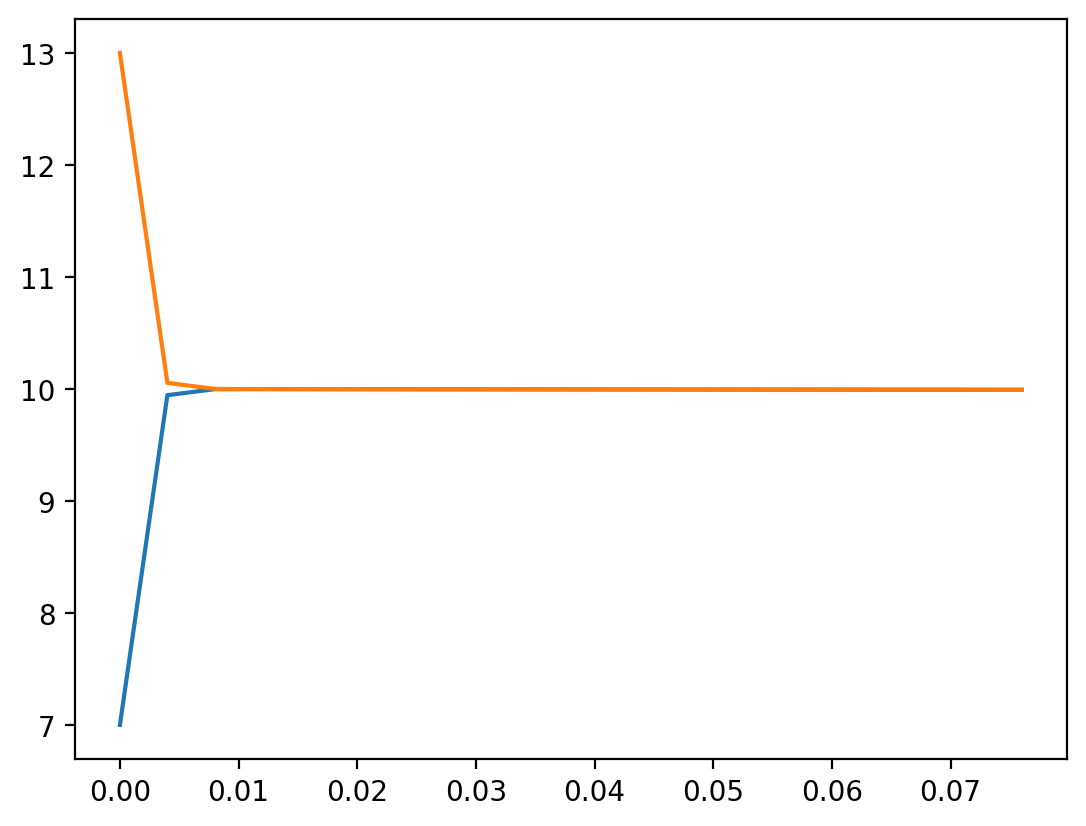

In [30]:
# Поиск точного решения
u = []
A = sympy.Matrix(A)
temp = A.eigenvects()
alfa1 = 250000000000000/58925565098879
alfa2 = -2500000000000000/176776695296637
lambda1 = temp[0][0]
lambda2 = temp[1][0]
W1 = temp[0][2][0]
W2 = temp[1][2][0]
x1  = x

for i in range(n):
    
    t = alfa1*W1*e**(lambda1*x1[i]) + alfa2*W2*e**(lambda2*x1[i])
    u.append(t)
U1 = []
U2 = []
time = np.linspace(0, max(x1), n)
for i in range(n):
    U1.append(u[i][0])
    U2.append(u[i][1])
plt.plot(time, U1)
plt.plot(time, U2)
u

In [31]:
# Расчет глобальной погрешности
E_1 = []
E_2 = []
for i in range(n):
    E_1.append(u[i][0] - v[i][0])
    E_2.append(u[i][1] - v[i][1])
print(E_2)


[-8.88178419700125e-15, 1.05494691666625, -0.332326945449529, 0.111129543748323, -0.0370366994313098, 0.0123456851960650, -0.00411522622388638, 0.00137174211492130, -0.000457247370372116, 0.000152415790743987, -5.08052629033529e-5, 1.69350883822972e-5, -5.64502864186522e-6, 1.88167710390985e-6, -6.27224739702115e-7, 2.09075942336767e-7, -6.96908823982767e-8, 2.32314629755592e-8, -7.74257991054128e-9, 2.58217092152790e-9]


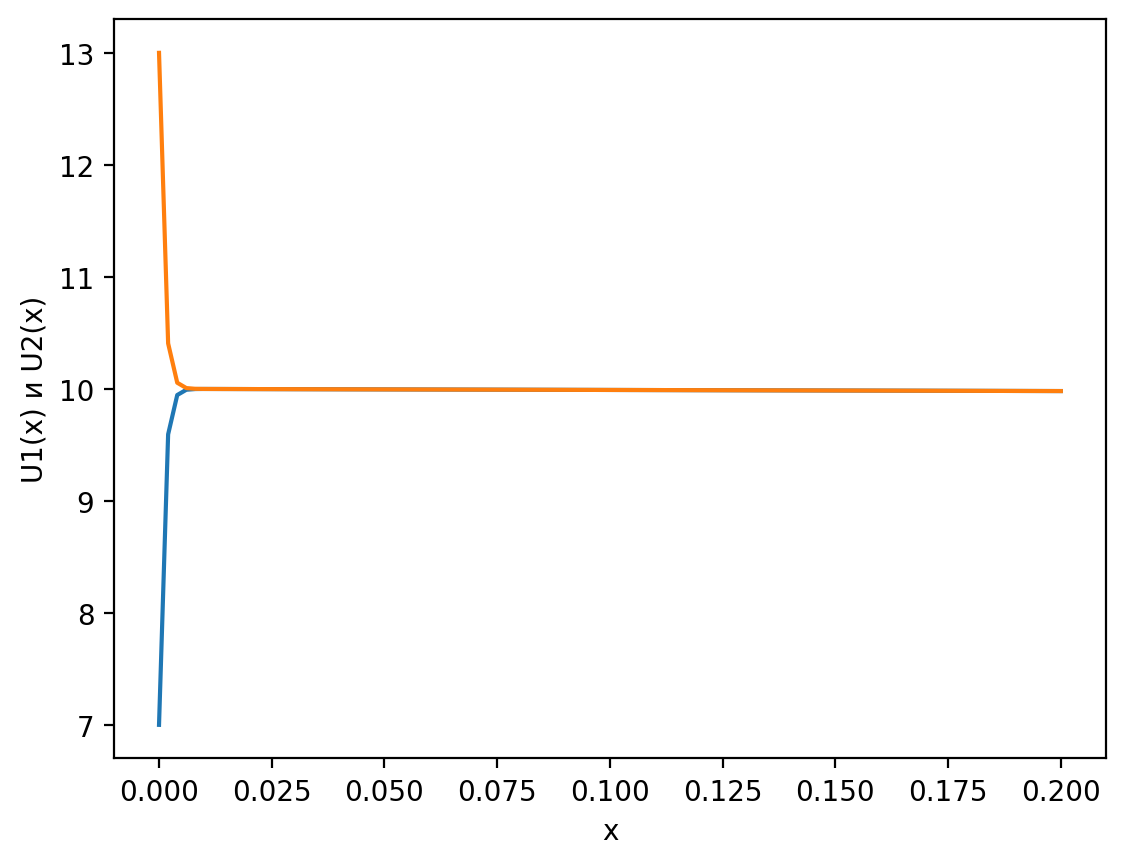

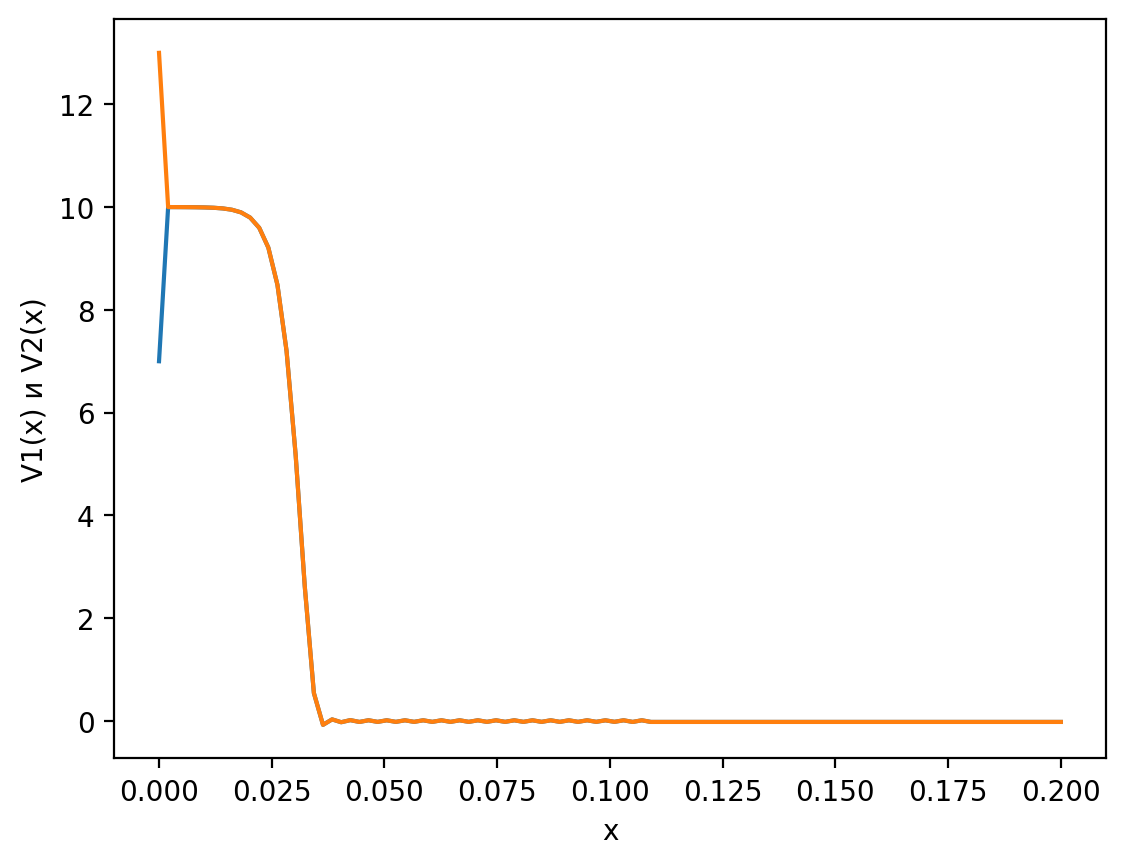

In [98]:
time = np.linspace(0, max(x1), n)
U1 = []
U2 = []
V1 = []
V2 = []
for i in range(n):
    U1.append(u[i][0])
    U2.append(u[i][1])
    V1.append(v[i][0])
    V2.append(v[i][1])
plt.plot(time, U1)
plt.plot(time, U2)
plt.xlabel('x')
plt.ylabel('U1(x) и U2(x)')
plt.show()

plt.plot(time, V1)
plt.plot(time, V2)
plt.xlabel('x')
plt.ylabel('V1(x) и V2(x)')
plt.show()

